In [1]:
import numpy as np
import pandas as pd

from tinkoff.invest import CandleInterval
from tinkoff.invest.sandbox.client import SandboxClient

import matplotlib.pyplot as plt
import tink_port as tink


pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)

In [2]:
import yaml
with open('settings.yaml') as f:
    # Load YAML data from the file
    read_data = yaml.load(f, Loader=yaml.FullLoader)

token = read_data["sandbox"]
WorkClient = SandboxClient

In [4]:
ts = tink.TinkSession(WorkClient, token)
base = ts.get_id_base()
port = ts.get_portfolio()
df_port = tink.port_to_df(port, base)

In [6]:
index_assets = ['AQUA', 'BANE', 'BANEP', 'CHMF', 'CIAN', 'FIVE', 'LKOH', 'MAGN', 'NLMK', 'POSI', 'ROSN', 'SBER',
                'SIBN', 'SMLT', 'SNGSP',  'TATN', 'TRNFP', 'OZON', 'WUSH', 'RTKM',  'MAGN', 'NVTK', 'YNDX']

In [13]:
from datetime import datetime
datetime.now()

datetime.datetime(2024, 11, 8, 12, 49, 7, 155410)

### Load data

In [7]:
port_shares = df_port.ticker.values
shares = base[base.type == 'shares']['ticker'].values
assets = [x for x in port_shares if x in shares]

In [8]:
assets = index_assets

In [10]:
from tinkoff.invest.utils import now
res = []
days = 300

for ticker in assets:
    print(ticker)
    figi = tink.ticker_to_figi(ticker, base)

    
    candles = tink.get_candles(WorkClient(token), figi, CandleInterval.CANDLE_INTERVAL_DAY, now(), days)
    df =  tink.get_open_price(candles)
    
    df.columns = [ticker]
    res.append(df)
    
dfp = pd.concat(res, axis = 1)

AQUA
BANE
BANEP
CHMF
CIAN
FIVE
Ошибка связи
Ошибка связи
Ошибка связи
Ошибка связи
LKOH
MAGN
NLMK
POSI
ROSN
SBER
SIBN
SMLT
SNGSP
TATN
TRNFP
OZON
WUSH
RTKM
MAGN
NVTK
YNDX
Ошибка связи
Ошибка связи
Ошибка связи
Ошибка связи


### PyBroker format

In [8]:
def get_ohlc(candles):
    res = []
    for row in candles:
        sdate = row[0]
        sdate = sdate.strftime("%Y-%m-%d")
        res.append([sdate] + row[1:5]) 
    df = pd.DataFrame(res, columns = ['date', 'open', 'high', 'low', 'close'])
    
    return df

In [9]:
dfx = base[base["type"] == "shares"]
dfx = dfx[dfx["cur"] == "rub"]

x = dfx.apply(lambda x: x.ticker in assets, axis = 1)
#dfx = dfx[res]

df_tink = dfx

In [12]:
res = []
for ind, row in df_tink.iterrows():
    pos = row 
#    print(pos.figi)        
    candles = tink.get_candles(token, pos.figi, CandleInterval.CANDLE_INTERVAL_DAY, 50)
    df =  get_ohlc(candles)
    ticker = tink.figi_to_ticker(pos.figi, base)
    if ticker == None:
        ticker = pos.figi
    df['symbol'] = ticker
    res.append(df)

df_pybr = pd.concat(res, axis = 0)

File D:\Data\Tink\BBG000VJMH65\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG004S687W8\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG004S68614\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG000R607Y3\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\TCS00A107J11\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\TCS00A0JVJQ8\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\TCS00A0ZZFS9\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\TCS009046502\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG004S68BR5\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG000QFH687\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG0027F0Y27\CANDLE_INTERVAL_DAY.meta was not found. Creating default.
File D:\Data\Tink\BBG

In [ ]:
df_work = df_pybr#[df_pybr.symbol.isin(index_assets)]
set(df_work.symbol)

In [14]:
df_work.to_csv("prices.csv", index = False)

In [15]:
import pandas as pd
import pybroker
from pybroker.data import DataSource

class CSVDataSource(DataSource):

    def __init__(self):
        super().__init__()
        # Register custom columns in the CSV.
        pybroker.register_columns('rsi')

    def _fetch_data(self, symbols, start_date, end_date, _timeframe, _adjust):
        df = pd.read_csv('prices.csv')
        df = df[df['symbol'].isin(symbols)]
        df['date'] = pd.to_datetime(df['date'])
        return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [21]:
csv_data_source = CSVDataSource()
df = csv_data_source.query(['POSI'], '6/1/2023', '4/4/2024')
df

Loaded cached bar data.



,date,open,high,low,close,symbol
4225,2024-02-13,2245.4,2275.0,2245.2,2253.0,POSI
4226,2024-02-14,2253.2,2257.2,2208.0,2231.4,POSI
4227,2024-02-15,2232.2,2262.2,2216.4,2246.4,POSI
4228,2024-02-16,2246.4,2293.0,2243.4,2281.0,POSI
4229,2024-02-19,2285.0,2329.8,2285.0,2300.0,POSI
4230,2024-02-20,2308.0,2313.2,2193.2,2207.4,POSI
4231,2024-02-21,2207.4,2249.8,2180.0,2230.2,POSI
4232,2024-02-22,2230.2,2259.0,2219.4,2241.6,POSI
4233,2024-02-26,2263.0,2327.2,2256.4,2312.6,POSI
4234,2024-02-27,2327.0,2333.0,2273.0,2321.6,POSI


### Rebalance Equal Position Sizing

In [22]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, StrategyConfig, FeeMode

pyb.enable_data_source_cache('rebalancing')

### Portfolio Optimization

In [23]:
def start_of_month(dt: datetime) -> bool:
    if dt.month != pyb.param('current_month'):
        pyb.param('current_month', dt.month)
        return True
    return False

def start_of_week(dt: datetime) -> bool:
    if dt.weekday() == 0:
        return True
    return False

def start_of_day(dt: datetime) -> bool:
    if dt.day != pyb.param('current_day'):
        pyb.param('current_day', dt.month)
        return True
    return False


def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares 

In [24]:
import pandas as pd
import riskfolio as rp

pyb.param('lookback', 30)  # Use past year of returns.

def calculate_returns(ctxs: dict[str, ExecContext], lookback: int):
    prices = {}
    for ctx in ctxs.values():
        prices[ctx.symbol] = ctx.close[-lookback:]
    df = pd.DataFrame(prices)
    return df.pct_change().dropna()

def optimization(ctxs: dict[str, ExecContext]):
    lookback = pyb.param('lookback')
    first_ctx = tuple(ctxs.values())[0]
    if start_of_day(first_ctx.dt):
        Y = calculate_returns(ctxs, lookback)
        port = rp.Portfolio(returns=Y)
        port.solvers = ['MOSEK']
        port.card = None 
        port.nea = 10
        port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)
        w = port.optimization(
            model='Classic',
            rm='CVaR',
            obj='MaxRet',
            rf=0,      # Risk free rate.
            l=0,       # Risk aversion factor.
            hist=True  # Use historical scenarios.
        )
        targets = {
            symbol: w.T[symbol].values[0]
            for symbol in ctxs.keys()
        }
        set_target_shares(ctxs, targets)

In [25]:
fee = FeeMode('order_percent')
config = StrategyConfig(initial_cash = 116_000,
                        fee_mode = fee,
                        fee_amount = 0.05)

In [26]:
opt_assets = df_tink.ticker.values.tolist()
opt_assets = index_assets
drops = ['GRNT', 'GTRK', 'EUTR', 'KZIZ', 'KZIZP', 'MRKY', 'MRKS','NTZL', 'OBNE', 'OBNEP', 'ORUP', 'SLAV', 'SFTL', 
         'TGKN', 'TGKB', 'TGKJ', 'TGKBP', 'UGLD', 'VEON-RX',  'ZILLP']
opt_assets = [x for x in opt_assets if x not in drops]

In [27]:
start_date = '11/1/2023'

strategy = Strategy(csv_data_source, start_date='2/13/2024', end_date='4/3/2024', config = config)
strategy.add_execution(None, opt_assets)
strategy.set_after_exec(optimization)
result = strategy.backtest(warmup=pyb.param('lookback'))

Backtesting: 2024-02-13 00:00:00 to 2024-04-03 00:00:00

Loaded cached bar data.

Test split: 2024-02-13 00:00:00 to 2024-03-29 00:00:00


100% (32 of 32) |########################| Elapsed Time: 0:00:00 Time:  0:00:0000



Finished backtest: 0:00:06


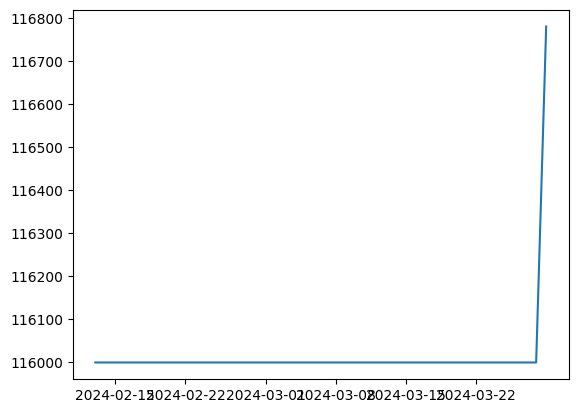

In [28]:
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])

In [124]:
result.orders;


In [180]:
result.metrics_df.iloc[32]

name       sharpe
value    0.240322
Name: 32, dtype: object

In [29]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,FIVE,2024-03-29,3,NaN,3002.25,4.50
2,buy,SNGSP,2024-03-29,87,NaN,65.80,2.86
3,buy,CIAN,2024-03-29,12,NaN,856.40,5.14
4,buy,YNDX,2024-03-29,2,NaN,3994.10,3.99
5,buy,OZON,2024-03-29,3,NaN,3758.75,5.64
6,buy,WUSH,2024-03-29,50,NaN,324.04,8.10
7,buy,POSI,2024-03-29,5,NaN,2743.20,6.86
8,buy,RTKM,2024-03-29,130,NaN,99.52,6.47
9,buy,CHMF,2024-03-29,4,NaN,1865.50,3.73


In [363]:
dfx = result.positions.tail(20)

In [33]:
dfx = dfx.reset_index()
dfx = dfx[['symbol', 'long_shares']]
dfx.columns = ['ticker', 'quantity']
dfx

KeyError: "None of [Index(['symbol', 'long_shares'], dtype='object')] are in the [columns]"

In [32]:
def df_to_dict(dfx):
    return {row.ticker:row.quantity for _,row in dfx.iterrows()}

old_port = df_to_dict(df_port)
new_port = df_to_dict(dfx)
new_port

AttributeError: 'Series' object has no attribute 'quantity'

In [30]:
def calculate_portfolio_difference(old_portfolio, new_portfolio):
    """
    Рассчитать разницу между двумя портфелями.

    Args:
        old_portfolio: Словарь, где ключом является тикер, а значением - количество акций.
        new_portfolio: Словарь, где ключом является тикер, а значением - количество акций.

    Returns:
        Словарь, где ключом является тикер, а значением - разница между количеством акций в 
        новых и старых портфелях.
    """

    difference = {}
    for ticker in new_portfolio:
        if ticker in old_portfolio:
            difference[ticker] = new_portfolio[ticker] - old_portfolio[ticker]
        else:
            difference[ticker] = new_portfolio[ticker]

    for ticker in old_portfolio:
        if ticker not in new_portfolio:
            difference[ticker] = -old_portfolio[ticker]
    # Сортировка по значению, по возрастанию
    sorted_diff = sorted(difference.items(), key=lambda x: x[1])
    sorted_diff = {k:v for k,v in sorted_diff}
    return sorted_diff

In [31]:
res = calculate_portfolio_difference(old_port, new_port)
res

NameError: name 'old_port' is not defined

In [304]:
df_port

,figi,ticker,name,quantity,price
7,BBG004S686N0,BANEP,Башнефть - привилегированные акции,14,2255.000
12,BBG00475K6C3,CHMF,Северсталь,39,1876.800
0,BBG004731032,LKOH,ЛУКОЙЛ,10,7584.000
4,BBG004S68507,MAGN,Магнитогорский металлургический комбинат,740,56.425
1,BBG004S681B4,NLMK,НЛМК,490,221.280
10,TCS00A103X66,POSI,Positive Technologies,11,2768.600
13,BBG004731354,ROSN,Роснефть,37,567.000
2,TCS00A107RZ0,RU000A107RZ0,ГК Самолет выпуск 13,40,995.000
11,BBG004730N88,SBER,Сбер Банк,220,298.860
6,BBG004S684M6,SIBN,Газпром нефть,27,742.700


In [218]:
dfx = result.trades.copy()
dfx = dfx[['symbol', 'pnl']].groupby('symbol').sum()
dfx.sort_values('pnl')

,pnl
symbol,
NOMP,-13070.94
SPBE,-7581.30
QIWI,-5513.50
UNAC,-5339.80
KROT,-4924.00
MRKZ,-4625.38
NOMPP,-4282.85
BLNG,-2272.16
APTK,-1772.29


In [149]:
csv_data_source = CSVDataSource()
df = csv_data_source.query(['BANEP'], '14/12/2023', '4/1/2024')
df.head(10)

Loaded cached bar data.



D:\Soft\Anaconda\envs\t\Lib\site-packages\pybroker\common.py:227: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date).to_pydatetime()


,date,open,high,low,close,symbol
8618,2023-12-14,1618.0,1623.0,1560.0,1562.0,BANEP
8619,2023-12-15,1556.0,1655.0,1541.0,1654.0,BANEP
8620,2023-12-18,1665.0,1724.0,1665.0,1715.0,BANEP
8621,2023-12-19,1719.5,1729.5,1682.0,1703.5,BANEP
8622,2023-12-20,1703.5,1746.5,1703.5,1738.0,BANEP
8623,2023-12-21,1745.0,1745.0,1691.0,1714.5,BANEP
8624,2023-12-22,1715.0,1741.5,1715.0,1725.0,BANEP
8625,2023-12-25,1734.5,1748.5,1715.5,1722.0,BANEP
8626,2023-12-26,1721.0,1740.0,1706.0,1733.5,BANEP
8627,2023-12-27,1735.0,1775.0,1731.5,1748.0,BANEP


In [152]:
result.orders;

### Rotation Trade

In [154]:
import pybroker as pyb
from pybroker import ExecContext, Strategy, StrategyConfig

In [155]:
import talib as ta

roc_20 = pyb.indicator(
    'roc_20', lambda data: ta.ROC(data.close, timeperiod=20))

In [157]:
def rank(ctxs: dict[str, ExecContext]):
    scores = {
        symbol: ctx.indicator('roc_20')[-1]
        for symbol, ctx in ctxs.items()
    }
    sorted_scores = sorted(
        scores.items(),
        key=lambda score: score[1],
        reverse=True
    )
    threshold = pyb.param('rank_threshold')
    top_scores = sorted_scores[:threshold]
    top_symbols = [score[0] for score in top_scores]
    pyb.param('top_symbols', top_symbols)

In [158]:
def rotate(ctx: ExecContext):
    if ctx.long_pos():
        if ctx.symbol not in pyb.param('top_symbols'):
            ctx.sell_all_shares()
    else:
        target_size = pyb.param('target_size')
        ctx.buy_shares = ctx.calc_target_shares(target_size)
        ctx.score = ctx.indicator('roc_20')[-1]

In [164]:
config = StrategyConfig(max_long_positions = 10,
                       initial_cash = 1_000_000,)
pyb.param('target_size', 1 / config.max_long_positions)
pyb.param('rank_threshold', 5)

5

In [167]:
strategy = Strategy(csv_data_source, start_date='1/1/2023', end_date='4/3/2024', config = config)
strategy.set_before_exec(rank)
strategy.add_execution(rotate, opt_assets, indicators=roc_20)
result = strategy.backtest(warmup=20)

Backtesting: 2023-01-01 00:00:00 to 2024-04-03 00:00:00

Loaded cached bar data.

Computing indicators...


100% (156 of 156) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Test split: 2023-01-03 00:00:00 to 2024-03-29 00:00:00


100% (315 of 315) |######################| Elapsed Time: 0:00:04 Time:  0:00:040000



Finished backtest: 0:00:06


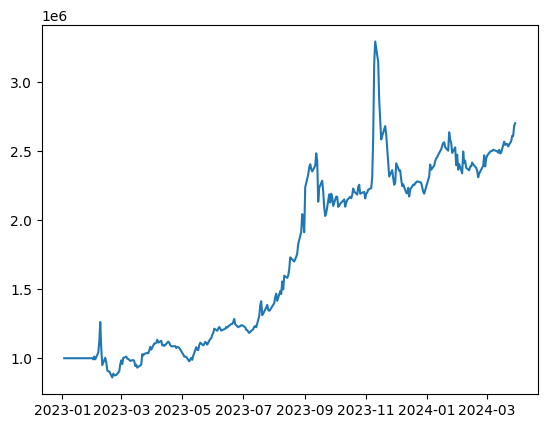

In [168]:
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])